# Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Generate the datasets A and B in R2 with each of them consisting 2000 data points from
normal distribution. The dataset A and B has been drawn from the N (μ1, Σ1 ) and N(
μ2, Σ2 ) . Let us fix the μ1 = [-1,1] and μ2 = [2,2]. Separate the 250 data points from each
classes as testing set. Plot the optimal Bayesian decision boundary for following cases.

In [2]:
np.random.seed(42)
A = np.random.multivariate_normal([-1,1],[[2,0],[0,2]],2000)
A_Y = np.ones((2000,1))
B = np.random.multivariate_normal([2,2],[[2,0],[0,2]],2000)
B_Y = np.zeros((2000,1))

#training set
X_Train = np.concatenate((A[:-250,:],B[:-250,:]))
X_Train = np.concatenate((X_Train,np.ones((3500,1))),axis=1)
Y_Train = np.concatenate((A_Y[:-250,:],B_Y[:-250,:]))

#testing set
X_Test = np.concatenate((A[-250:,:],B[-250:,:]))
X_Test = np.concatenate((X_Test,np.ones((500,1))),axis=1)
Y_Test = np.concatenate((A_Y[-250:,:],B_Y[-250:,:]))


def case1(u1,u2):
    w = u1-u2
    x0 = 0.5*(u1+u2)
    x1 = np.linspace(-1,2,100)
    if w[1] == 0:
        y = np.zeros((100,1))
    else:
        y = -1*(w[0]*x1- w@x0)/w[1]
    plt.plot(x1,y, color='red')
    plt.show
    
def case2(u1,u2,sigma):
    w = np.linalg.inv(sigma)@(u1-u2)
    x0 = 0.5*(u1+u2)
    x1 = np.linspace(-3,3,100)
    if w[1] == 0:
        y = np.zeros((100,1))
    else:
        y = -1*(w[0]*x1- w@x0)/w[1]
        
    plt.plot(x1,y, color='red')
    plt.show


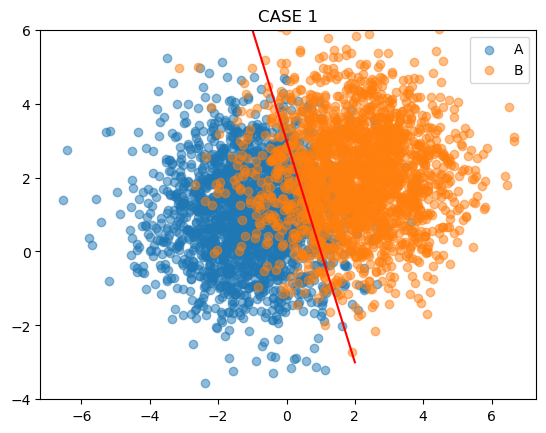

In [72]:
# CASE 1:
A1 = np.random.multivariate_normal([-1,1],[[2,0],[0,2]],2000)
B1 = np.random.multivariate_normal([2,2],[[2,0],[0,2]],2000)
u1 = np.array([-1,1])
u2 = np.array([2,2])
s = np.array([[2,0],[0,2]])
plt.scatter(A1[:,0],A1[:,1], alpha=0.5, label = 'A')
plt.scatter(B1[:,0],B1[:,1],alpha=0.5, label = 'B')
plt.title('CASE 1')
plt.legend()
plt.ylim(-4,6)
case1(u1,u2)

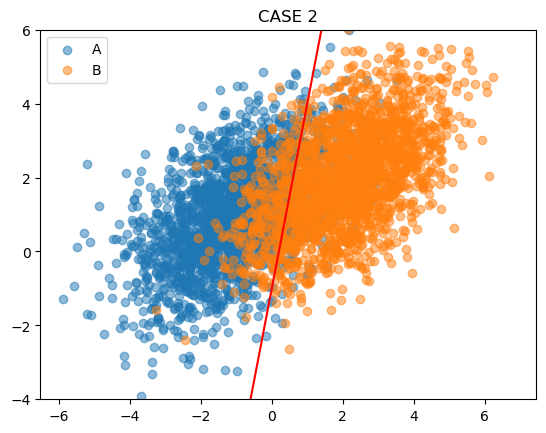

In [73]:
# CASE 2:
A2 = np.random.multivariate_normal([-1,1],[[2,1],[1,2]],2000)
B2 = np.random.multivariate_normal([2,2],[[2,1],[1,2]],2000)
u1 = np.array([-1,1])
u2 = np.array([2,2])
s = np.array([[2,1],[1,2]])
plt.scatter(A2[:,0],A2[:,1], alpha=0.5, label = 'A')
plt.scatter(B2[:,0],B2[:,1],alpha=0.5, label = 'B')
plt.title('CASE 2')
plt.legend()
plt.ylim(-4,6)
case2(u1,u2,s)

2. Write a function implementing the logistic regression model using the gradient descent
method using the dataset generated for question 1. Plot the decision boundary
obtained by the logistic regression. Compare it with the Bayesian decision boundary.

In [74]:
def sig_func(X,W):
    return 1.0/(1.0 + np.exp(-1.0*(X@W)))

def RMSE(predicted,actual):
    return np.sqrt(np.mean((predicted - actual) ** 2))

def hyperparameter_tuning(X,Y):
    lamda = [ 2**i for i in range(-12,8)]
    parameters = []
    for j in range(len(lamda)):
            coeff = logistic_regression(X,Y,lamda)
            prediction = sig_func(X,coeff)
            rmse = RMSE(prediction,Y)
            parameters.append((rmse,lamda[j], coeff))
    minimum = min(parameters)
    return minimum[1]


def logistic_regression(X,Y,lamda,iterations=1000,tolerance=0.0001, alpha=0.01):
    m, n = X.shape
    W = np.zeros((n,1))
    itr = 0
    while itr < iterations:
        itr = itr + 1
        grad = X.T@(sig_func(X,W)-Y) + lamda*W
        W = W - alpha*grad
        if np.linalg.norm(grad)<=tolerance:
            break
        alpha = alpha/(1+0.002)
    return W

def separating_surface(W):
    x = np.linspace(-3,3,100)
    y = -1*((W[0]*x + W[2])/W[1])
    plt.plot(x,y, color='red')
    plt.show

In [75]:
# Prediction and RMSE
lamda = hyperparameter_tuning(X_Train,Y_Train)
coeff = logistic_regression(X_Train,Y_Train, lamda)
pred = sig_func(X_Test,coeff)
RMSE(pred,Y_Test)

0.33370106629927676

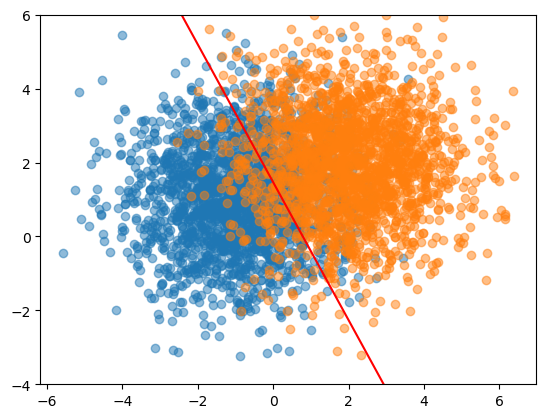

In [76]:
# Decision Boundary
plt.scatter(A[:,0],A[:,1], alpha=0.5)
plt.scatter(B[:,0],B[:,1],alpha=0.5)
plt.ylim(-4,6)
separating_surface(coeff)

3. Consider the Iris dataset. The dataset contains three types of flower described by the
four features. Consider only the data points with label 1 and 2. Divide the dataset into
training and testing set in the ration 8:1:1. Use the training set to train the logistic
regression model. Use the validation set to tune the parameter values of your model.
Finally obtain the accuracy on the test set.

In [77]:
iris_df = pd.read_csv(r"G:\My Drive\Files\Iris.csv")
iris_df = iris_df.filter(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
iris = iris_df.loc[(iris_df['Species'] == 'Iris-setosa') | (iris_df['Species'] == 'Iris-versicolor')]
iris.loc[iris['Species'] == 'Iris-setosa', 'Species'] = 0
iris.loc[iris['Species'] == 'Iris-versicolor', 'Species'] = 1
iris.loc[:, 'Species'] = iris.loc[:, 'Species'].astype('int')

C:\Users\ayxxh\AppData\Local\Temp\ipykernel_2820\758628121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris.loc[:, 'Species'] = iris.loc[:, 'Species'].astype('int')


In [78]:
def split(data,train,validate,test):
    d = len(data)
    x = int(d*train)
    y = int(d*validate)
    z = int(d*test)

    data = data.sample(frac=1, random_state=123)

    T = data.iloc[ : x,:]
    V = data.iloc[x : x+y,:]
    t = data.iloc[x+y : x+y+z,:]

    return T,V,t

def accuracy(predicted,actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    TN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))

    if TP + TN + FP + FN == 0:
        return 0.0

    return (TP+TN)/(TP+FP+TN+FN)
    
train, validate, test  = split(iris,0.8,0.1,0.1)

#train
train_X = np.array(train.iloc[:,:-1])
train_X = np.concatenate((train_X,np.ones((len(train_X),1))),axis=1)
train_Y = np.array(train.iloc[:,-1:])

#validate
valid_X = np.array(validate.iloc[:,:-1])
valid_X = np.concatenate((valid_X,np.ones((len(valid_X),1))),axis=1)
valid_Y = np.array(validate.iloc[:,-1:])

#test
test_X = np.array(test.iloc[:,:-1])
test_X = np.concatenate((test_X,np.ones((len(test_X),1))),axis=1)
test_Y = np.array(test.iloc[:,-1:])



In [79]:
# Prediction and Accuracy
lamda = hyperparameter_tuning(valid_X,valid_Y)
coeff = logistic_regression(train_X,train_Y,lamda)
pred = sig_func(test_X,coeff)
print(f'Accuracy: {accuracy(pred,test_Y)}')

Accuracy: 1.0


4. Learn about the different evaluation measure of a classification model namely Accuracy,
Precision, Recall, Confusion matrix, F-Score and their significance. Write a brief note
about them and submit it (Not less than 200 words). Compute all of them for problem 3.

### Accuracy:
Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.It represents the percentage of correctly classified instances out of the total number of instances in the dataset. It is a simple and intuitive measure, but it can be misleading when the dataset is imbalanced, i.e., when one class is significantly more prevalent than the others.
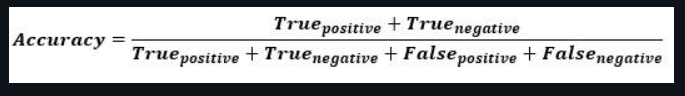

### Precision:
The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive.It measures the model's ability to identify the positive instances accurately. High precision means that the model makes fewer false positive predictions.
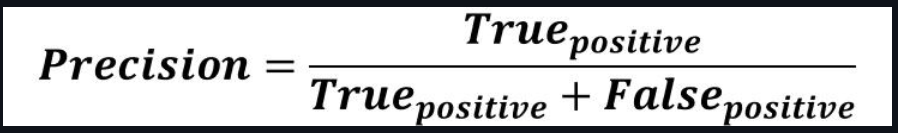

### Recall:
The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected. High recall means that the model makes fewer false negative predictions.   
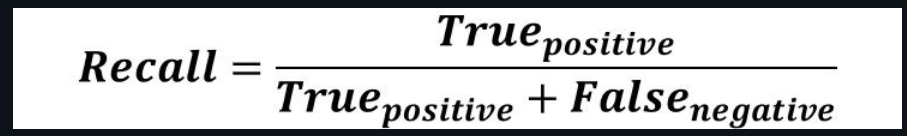

### Confusion matrix:
A confusion matrix is a table that summarizes the model's predictions and the actual class labels of the instances in the dataset. It contains four values: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). It provides a detailed view of the model's performance and helps to identify the types of errors the model is making.
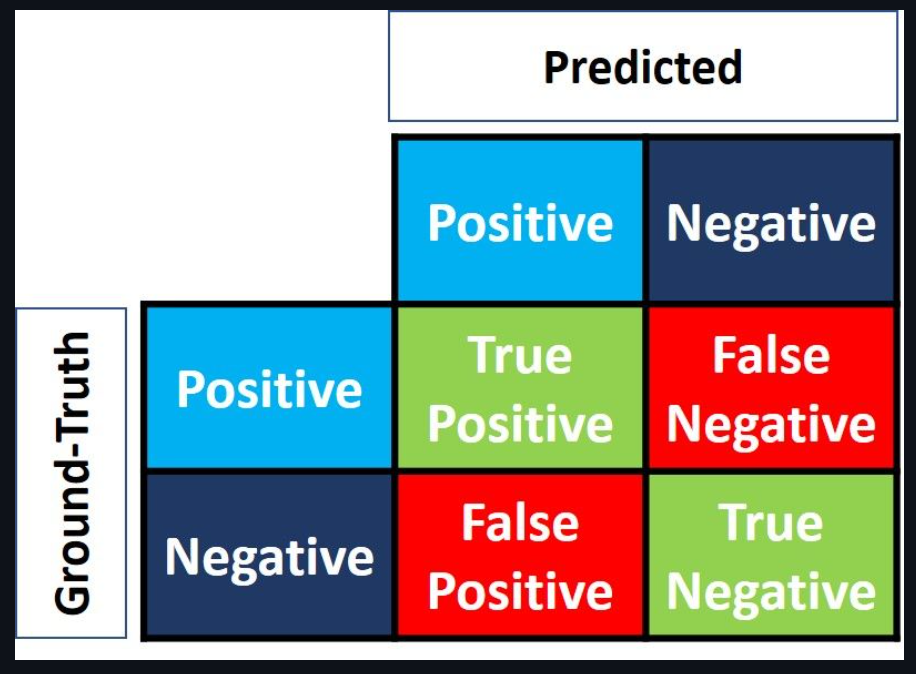

### F-Score:
The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.The F-score is commonly used for evaluating information retrieval systems such as search engines, and also for many kinds of machine learning models, in particular in natural language processing.
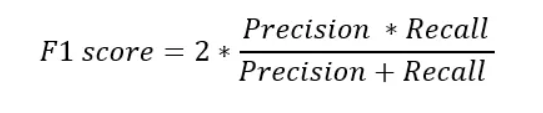

In [80]:
def accuracy(predicted,actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    TN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))

    if TP + TN + FP + FN == 0:
        return 0.0

    return (TP+TN)/(TP+FP+TN+FN)


def precision(predicted, actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    FP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))

    if TP + FP == 0:
        return 0.0

    return TP/(TP+FP)

def recall(predicted, actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    FN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))

    if TP + FN == 0:
        return 0.0

    return TP/(TP+FN)

def confusion_matrix(predicted,actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    TN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))

    return [f'TP: {TP}',f'FN: {FN}',f'FP: {FP}',f'TN: {TN}']

def f_score(predicted,actual):
    threshold = 0.5

    pred_binary = np.where(predicted>threshold,1,0)
    actu_binary = np.where(actual>threshold,1,0)

    TP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))
    FP = sum(1 if (pred_binary[i][0] == 1) & (actu_binary[i][0] == 0)  else 0 for i in range(len(actual)))
    FN = sum(1 if (pred_binary[i][0] == 0) & (actu_binary[i][0] == 1)  else 0 for i in range(len(actual)))

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    if precision + recall == 0:
        return 0.0

    return 2 * (precision * recall)/(precision+recall)



In [82]:
print(f'''
Accuracy: {accuracy(pred,test_Y)}
Precision: {precision(pred,test_Y)}
Recall: {recall(pred,test_Y)}
Confusion Matrix: {confusion_matrix(pred,test_Y)}
F-Score: {f_score(pred,test_Y)}
''')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: ['TP: 6', 'FN: 0', 'FP: 0', 'TN: 4']
F-Score: 1.0

